# Mapeo Logístico

## Josué Juárez Morales
---
Sea la ecuación
\begin{equation}
f(x) = rx(1-x),
\end{equation}
su derivada esta dada por
\begin{equation}
f'(x) = r(1-2x),
\end{equation}
igualando a cero la derivada y despejando para $x$ encontramos que en $x = 1/2$ se encuentra un punto crítico, es importante notar que la coordenada $x$ del punto crítico siempre esta centrada en el centro de la parabola.

La segunda derivada de la función es
\begin{equation}
f''(x) = -2r,
\end{equation}
la cual es siempre negativa para todo $x$ y por lo tanto el punto crítico encontrado corresponde a un máximo global de la función.

Evaluando $f(1/2)$
\begin{equation}
f(1/2) = r/4,
\end{equation}
se observa que escogiendo un $r=4$ la curva queda encerrada por el cuadrado unitario.

El mapeo logistico se expresa mediante la ecuación
\begin{equation}
x_{n+1} = rx_{n}(1-x_{n}),
\end{equation}
donde $x_{n} \in [0, 1]$.

Ahora escribimos un codigo que aplique el mapeo logistico.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definimos una función que toma por entradas un valor de r, y uno de x.
def M(r, x):
  return r*x*(1-x)

In [3]:
M(2,0.2)

0.32000000000000006

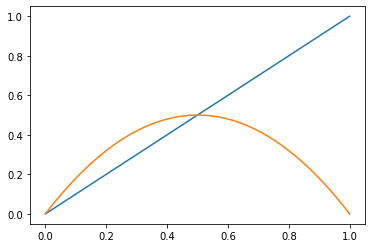

In [4]:
#La definicion de M acepta a x siendo un arreglo en forma de lista
x = np.linspace(0,1)
m1 = M(2,x)
plt.plot(x,x)
plt.plot(x, m1)

Los puntos de intersección del mapeo con la recta $y=x$ se llaman puntos fijos, el punto $(0,0)$ siempre esta en la interseccion del mapeo y la recta.

El segundo punto fijo se encuentra en $(1-1/r, 1-1/r)$. Dependiendo el valor de $r$, el mapeo toma una altura mayor o menor, haciendo que el segundo punto fijo se desplaze a la derecha del mapeo al aumentar el valor de $r$.

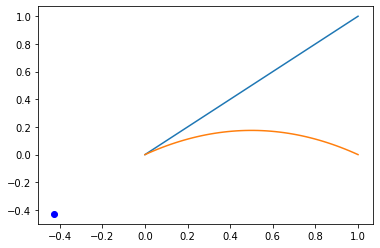

In [5]:
m1 = M(0.7,x)
plt.plot(x,x)
plt.plot(x, m1)
plt.plot(1-1/0.7,1-1/0.7, 'bo')

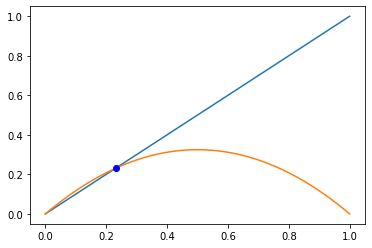

In [6]:
m1 = M(1.3,x)
plt.plot(x,x)
plt.plot(x, m1)
plt.plot(1-1/1.3,1-1/1.3, 'bo')

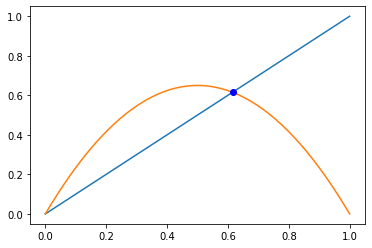

In [7]:
m1 = M(2.6,x)
plt.plot(x,x)
plt.plot(x, m1)
plt.plot(1-1/2.6,1-1/2.6, 'bo')

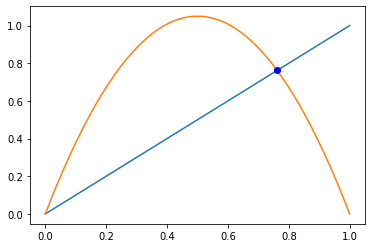

In [8]:
m1 = M(4.2,x)
plt.plot(x,x)
plt.plot(x, m1)
plt.plot(1-1/4.2,1-1/4.2, 'bo')

Una pregunta interesante es ¿para que valor de $r$, la recta tangente al segundo punto fijo es perpendicular a la recta $y=x$?

La pendiente en el punto $(1-1/r, 1-1/r)$ se encuentra evaluando la derivada de $f$
\begin{equation}
f(1-1/r) = 2-r,
\end{equation}
entonces la recta tangente al segundo punto fijo es
\begin{equation}
y = (2-r)x + (r-1) \left( 1-\frac{1}{r} \right),
\end{equation}

Para que dos rectas sean perpendiculares la pendiente de una debe ser el negativo del inverso de la otra pendiente, en este caso
\begin{equation}
1 = - \frac{1}{2-r}
\end{equation}
la cual se cumple en $r=3$.

(0, 1)

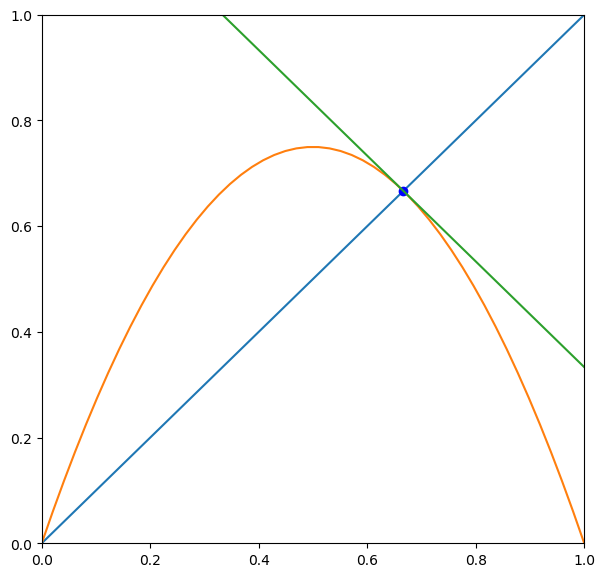

In [9]:
r = 3
m1 = M(r,x)
plt.figure(figsize=(7, 7), dpi = 100)
plt.plot(x,x)
plt.plot(x, m1)
plt.plot(1-1/r,1-1/r, 'bo')
plt.plot(x, (2-r)*x + (r-1)*(1-1/r))
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])


¿Que pasa si a un mapeo logistico se aplica a otro mapeo logistico?
Observamos que
\begin{equation}
f(rx(1-x)) = r(rx(1-x))(1-rx(1-x)) = r^{2}(x-x^2)(1-rx+rx^2)
\end{equation}
es un polinomio de grado cuatro. Si aplicamos el segundo mapeo en otro mapeo logistico resultaria en un polinomio de grado seis.

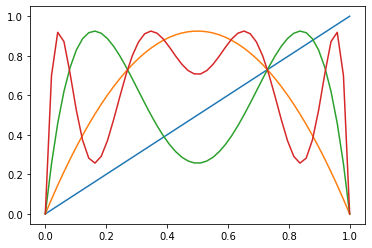

In [10]:
r = 3.7
m1 = M(r,x)
m2 = M(r, m1)
m3 = M(r, m2)
plt.plot(x,x)
plt.plot(x, m1)
plt.plot(x, m2)
plt.plot(x, m3)

Es intersante que los puntos fijos son los mismos para todos los mapeos.

Ahora creamos una función que aplique el mapeo $n$ veces nosotros queramos.

In [16]:
def Mn(r, x, n):
  if n == 0:
    return x
  m1 = M(r,x)
  for i in range(n):
    m2 = M(r, m1)
    m1 = m2
  return m1

#mn = Mn(r, x, n-1)

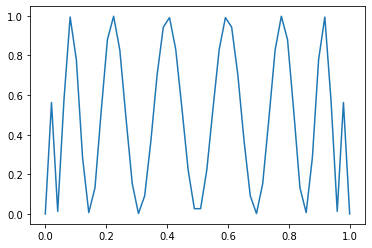

In [21]:
r = 4
m4 = Mn(r, x, 3)
plt.plot(x, m4)

La gráfica comienza a mostrar picos, esto se debe a que en esas partes la interpolacion que hace el graficados no es muy buena. Una manera de solucionar esto es dando al arreglo $x$ mas elementos.

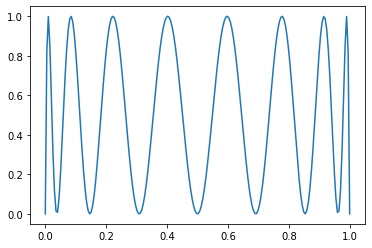

In [22]:
x = np.linspace(0, 1, 200) #divide el intervalo cero uno en doscientos. Por defecto lo hace en cincuenta
m4 = Mn(r, x, 3)
plt.plot(x, m4)

Podemos investigar la estabilidad del segundo punto fijo. Si a un punto inicial le aplicamos el mapeo, y si a este mapeo lo tomamos ahora como punto inicial y lo mapeamos, y asi sucesivamente, si cada vez el punto inicial se va acerdando al segundo punto fijo, se dice que este es estable. Si en vez de acercarse se va alejando, entonces tenemos un punto fijo inestable.

Podemos observar esto si graficamos las orbitas de los puntos iniciales alrededor del segundo punto fijo.

In [64]:
def orbita(r, n, x0):
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6), sharey=True)
  orbit = [x0]
  t = np.linspace(0,1)
  ax1.plot(t,t)
  ax1.plot(t,M(r,t))
  x = x0
  for i in range(n): #numero de veces que va a orbitar
    y = M(r,x)
    
    ax1.plot([x,x],[x,y], 'b')
    ax1.plot([x,y],[y,y], 'b')
    
    x = y
    
    orbit.append(x)
    
  ax1.set_xlim()
  ax1.set_ylim() 
  ax1.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")

  ax2.plot(orbit)

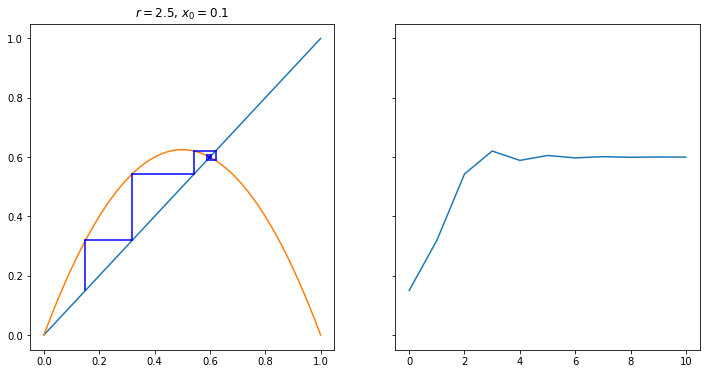

In [65]:
orbita(2.5,10,.15)

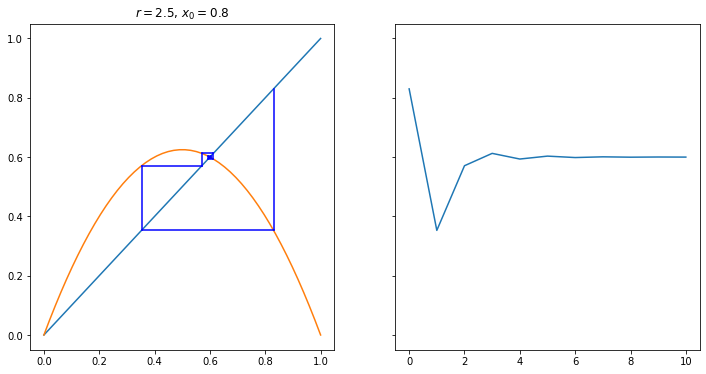

In [66]:
orbita(2.5,10,.83)

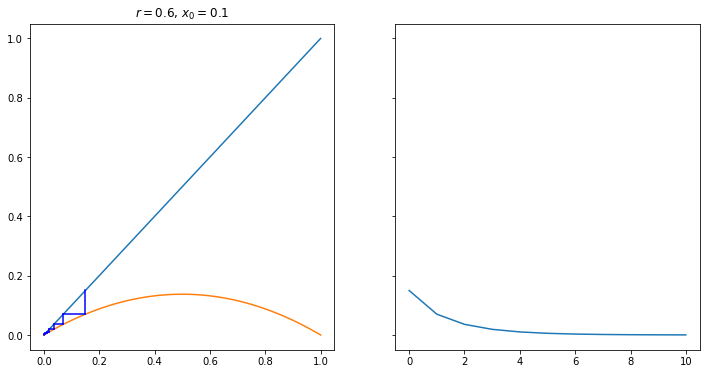

In [67]:
orbita(.55,10,.15)

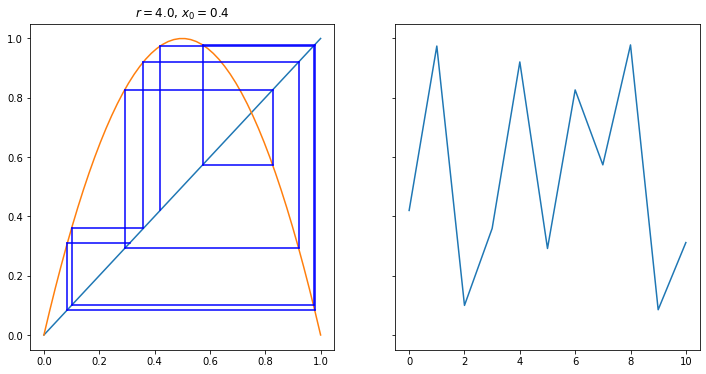

In [71]:
orbita(4,10,.42)

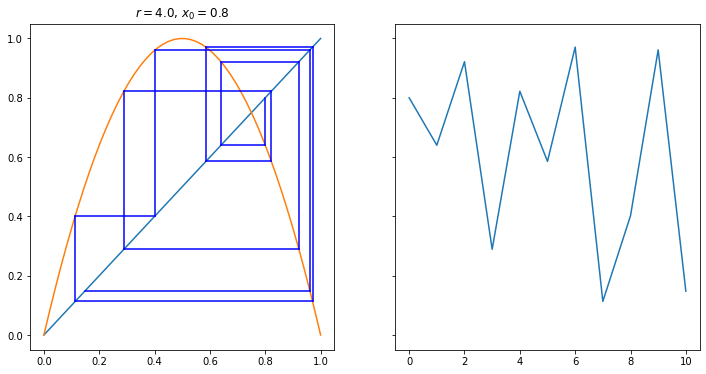

In [72]:
orbita(4,10,.8)